# Integrate and Fire neural network

In this model the voltage changes of the neuron are divided in two parts:

1. Under the threshold value the membrane has no voltage-dependent ion channels and act passively as a leaky capacitor whose voltage decays to a resting level $E_L$
2. When the voltage reaches the action potential threshold the model assumes that the voltages spikes immediately to a level $V_{spike}$ and then is inmmediately reset to a hyperpolarized level $V_{reset}$. 

$$
\tau_m \frac{dV}{dt}=E_L - V + R_m I_m
$$

$$
\tau_m=R_mC_m
$$

In [3]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
from numpy import *
from pylab import *

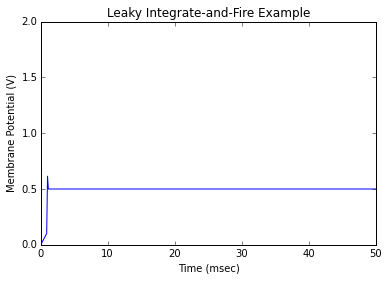

In [10]:
## setup parameters and state variables
T       = 50                  # total time to simulate (msec)
dt      = 0.125               # simulation time step (msec) Procesor
time    = arange(0, T+dt, dt) # time array
t_rest  = 0                   # initial refractory time

## LIF properties
Vm      = zeros(len(time))    # potential (V) trace over time
Rm      = 1                   # resistance (kOhm)
Cm      = 10                  # capacitance (uF)
tau_m   = Rm*Cm               # time constant (msec)
tau_ref = 4                   # refractory period (msec)
Vth     = 1                   # spike threshold (V)
V_spike = 0.5                 # spike delta (V)

## Stimulus
I       = 1.2              # input current (A)

## iterate over each time step
for i, t in enumerate(time):
    if t > t_rest:
        Vm[i] = Vm[i-1] + (-Vm[i-1] + I*Rm) / tau_m * dt
    if t >= Vth:
        Vm[i] += V_spike
        t_rest = t + tau_ref

## plot membrane potential trace
plot(time, Vm)
title('Leaky Integrate-and-Fire Example')
ylabel('Membrane Potential (V)')
xlabel('Time (msec)')
ylim([0,2])
show()